In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

import neuro_morpho_toolbox as nmt
%matplotlib inline
#ns=nmt.neuron_set('/home/penglab/Documents/Janelia_1000')
import pickle
pickle_in = open("/home/penglab/FeaCal/ns.pickle","rb")
example_ = pickle.load(pickle_in)
ns= example_[0]

/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.96
Loading CCF brain structure data...
Loading time: 0.00


In [2]:
AP_hierDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_hierDF.xlsx', index_col=0)
AP_kmeansDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_kmeansDF.xlsx', index_col=0)
AP_dbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_dbscanDF.xlsx', index_col=0)
AP_hdbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_hdbscanDF.xlsx', index_col=0)
AP_snnDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_snnDF.xlsx', index_col=0)


SL_hierDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_hierDF.xlsx', index_col=0)
SL_kmeansDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_kmeansDF.xlsx', index_col=0)
SL_dbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_dbscanDF.xlsx', index_col=0)
SL_hdbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_hdbscanDF.xlsx', index_col=0)
SL_snnDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_snnDF.xlsx', index_col=0)

AM_hierDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/AM_hierDF.xlsx', index_col=0)
AM_kmeansDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/AM_kmeansDF.xlsx', index_col=0)
AM_dbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/AM_dbscanDF.xlsx', index_col=0)
AM_hdbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/AM_hdbscanDF.xlsx', index_col=0)
AM_snnDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/AM_snnDF.xlsx', index_col=0)


DM_hierDF = pd.read_excel('/home/penglab/FeaCal/dataSource/denMor/DM_hierDF.xlsx', index_col=0)
DM_kmeansDF = pd.read_excel('/home/penglab/FeaCal/dataSource/denMor/DM_kmeansDF.xlsx', index_col=0)
DM_dbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/denMor/DM_dbscanDF.xlsx', index_col=0)


DM_hdbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/denMor/DM_hdbscanDF.xlsx', index_col=0)
DM_snnDF = pd.read_excel('/home/penglab/FeaCal/dataSource/denMor/DM_snnDF.xlsx', index_col=0)

## Set Color

In [3]:
import seaborn as sns; sns.set()




colorlist=["#7FC97F","#BEAED4","#FDC086","#FFFF99","#386CB0","#F0027F","#BF5B17","#666666","#1B9E77","#D95F02",
           "#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D","#666666","#A6CEE3","#1F78B4","#B2DF8A","#33A02C",
           "#FB9A99","#E31A1C","#FDBF6F","#FF7F00","#CAB2D6","#6A3D9A","#FFFF99","#B15928","#FBB4AE","#B3CDE3",
           "#CCEBC5","#DECBE4","#FED9A6","#FFFFCC","#E5D8BD","#FDDAEC","#F2F2F2","#B3E2CD","#FDCDAC","#CBD5E8",
           "#F4CAE4","#E6F5C9","#FFF2AE","#F1E2CC","#CCCCCC","#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00",
           "#FFFF33","#A65628","#F781BF","#999999","#66C2A5","#FC8D62","#8DA0CB","#E78AC3","#A6D854","#FFD92F",
           "#E5C494","#B3B3B3","#8DD3C7","#FFFFB3","#BEBADA","#FB8072","#80B1D3","#FDB462","#B3DE69","#FCCDE5",
           "#D9D9D9","#BC80BD","#CCEBC5"]
lut = dict(zip(ns.metadata['CellType'].unique(), colorlist))
row_colors = ns.metadata['CellType'].map(lut)
row_colors[row_colors.isnull()]='white'

# Plot cocluster 

In [4]:

from scipy.spatial import distance
from scipy.cluster import hierarchy
import numpy as np

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster,inconsistent
#print the cocluster result
#output the linkage matrix
def bestCOCLUSTER(df):
    linkmethod = ['single', 'complete','average','weighted','centroid','median','ward']
    paraDF = pd.DataFrame(columns =['method','CCC'],index = linkmethod)
    paraDF.loc[:,'method'] = linkmethod
    
    for iter_m in linkmethod:
        Y = distance.pdist(np.asarray(df))
        Z = hierarchy.linkage(Y, method = iter_m)
        c, coph_dists = hierarchy.cophenet(Z,Y)
        paraDF.loc[iter_m,'CCC'] = c
    paraDF.sort_values(by='CCC', ascending = False, inplace = True)
    #print(paraDF)
    row_linkage = hierarchy.linkage(distance.pdist(np.asarray(df)), method = paraDF.iloc[0,0])

    col_linkage = hierarchy.linkage(distance.pdist(np.asarray(df).T), method = paraDF.iloc[0,0])
    #print(paraDF.iloc[0,0])
    sns.clustermap(df, row_linkage = row_linkage, col_linkage = col_linkage, row_colors=row_colors ,col_colors = row_colors, figsize=(13, 13))#, cmap=sns.diverging_palette(h_neg=150, h_pos=275, s=80, l=55, as_cmap=True))    
    return hierarchy.linkage(distance.pdist(np.asarray(df)))



def coclusterResult(Z_sample):
    t = input('Please input the number of cluster: ')
    return fcluster(Z_sample,t,criterion='maxclust')

## Set neuron_set.metadata['Cluster']

From featureDF we can generate the corresponding UMAP, then we will use the coclustering result to perfrom fcluster, then set the ['cluster']result

In [5]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

* scaleData is the dataframe containing features extracted from Vaa3D
* Z_Sample is the condensed distance matrix from cocluster

In [6]:
import pickle
def generateNS(featureDF,ns_input,Z_sample,storePath,outname):
    if featureDF.shape!= (0,0):
        pickle_in = open("/home/penglab/FeaCal/ns.pickle","rb")
        example_ = pickle.load(pickle_in)
        ns_input= example_[0]

        index_origin = ns_input.metadata.index.tolist()
        ns_input.UMAP = nmt.UMAP_wrapper(featureDF, n_neighbors=100, min_dist=0.1, n_components=2, metric='euclidean',
                                   PCA_first=True,n_PC=100)
        index_after = ns_input.UMAP.index.tolist()
        if len(index_after)>len(index_origin ):
            index_update = [i for i in index_after if i in index_origin ]
        else:
            index_update = [i for i in index_origin if i in index_after ]
        
        ns_input.metadata = ns_input.metadata.loc[index_update,:]
    cur_clusters = coclusterResult(Z_sample)
    ns_input.metadata['Cluster'] = ['C' + str(i) for i in cur_clusters] 
    _ = ns_input.FeatureScatter(["CellType", "Hemisphere","Cluster"], map="UMAP")
    return ns_input

## For soma location features

In [7]:
_ = ns.ReduceDimUMAP(feature_set="soma_features", n_neighbors=100)


#### Hierarchy 

Please input the number of cluster: 9


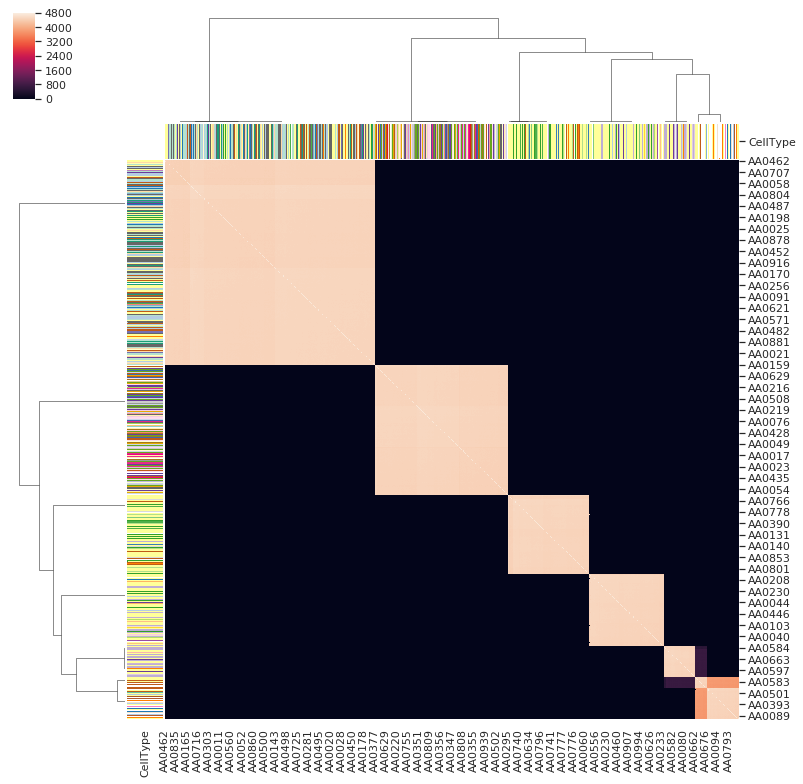

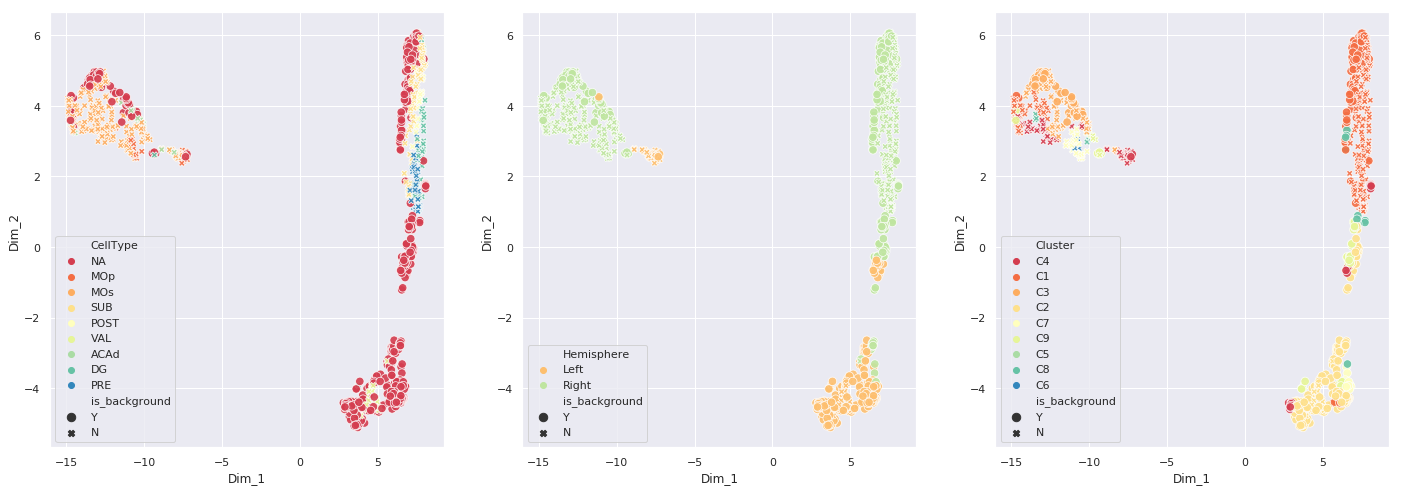

In [8]:
Ztemp= bestCOCLUSTER(SL_hierDF)
generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','SL_hier_ns')

#### Kmeans

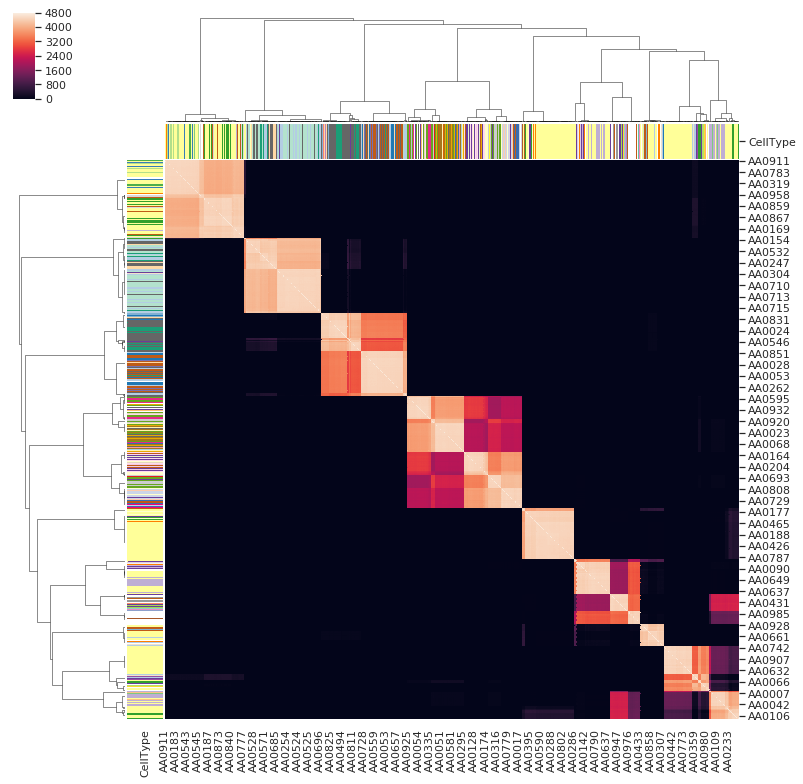

In [9]:
Ztemp= bestCOCLUSTER(SL_kmeansDF)

Please input the number of cluster: 10


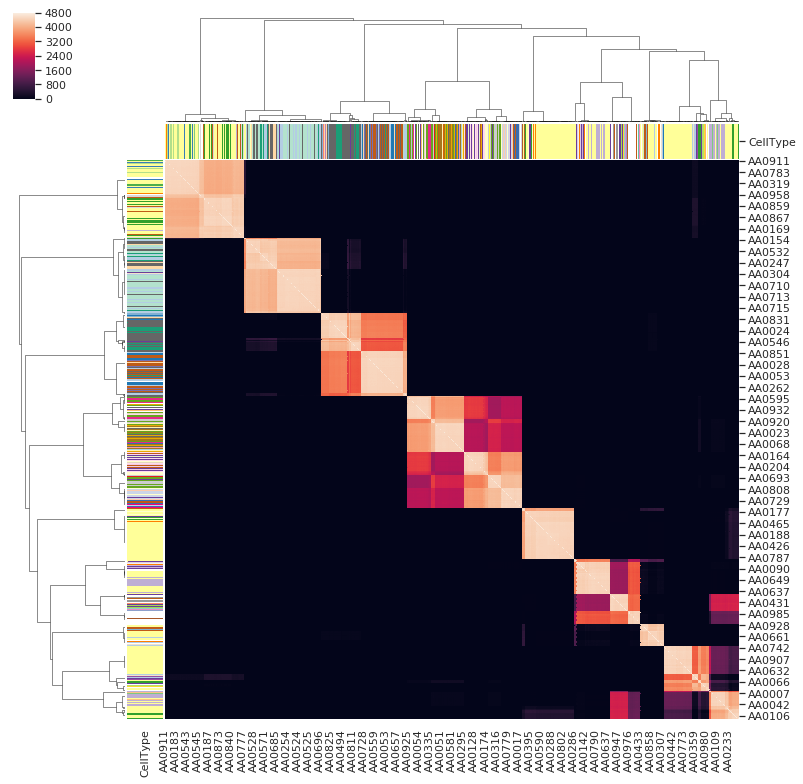

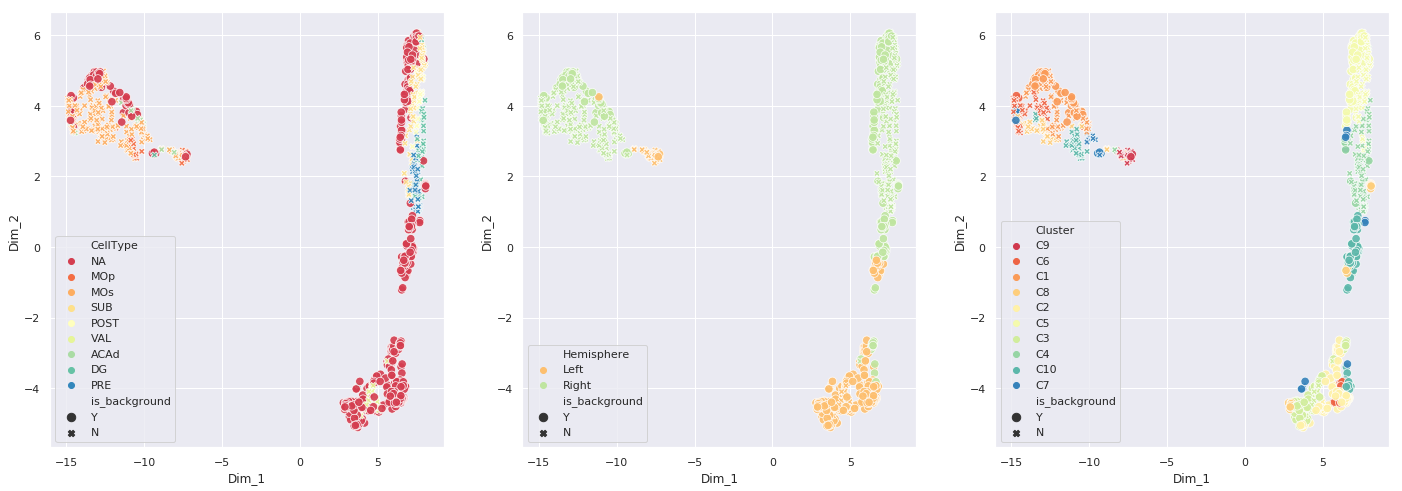

In [10]:
Ztemp= bestCOCLUSTER(SL_kmeansDF)
generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','SL_kmeans_ns')

#### DBSCAN 

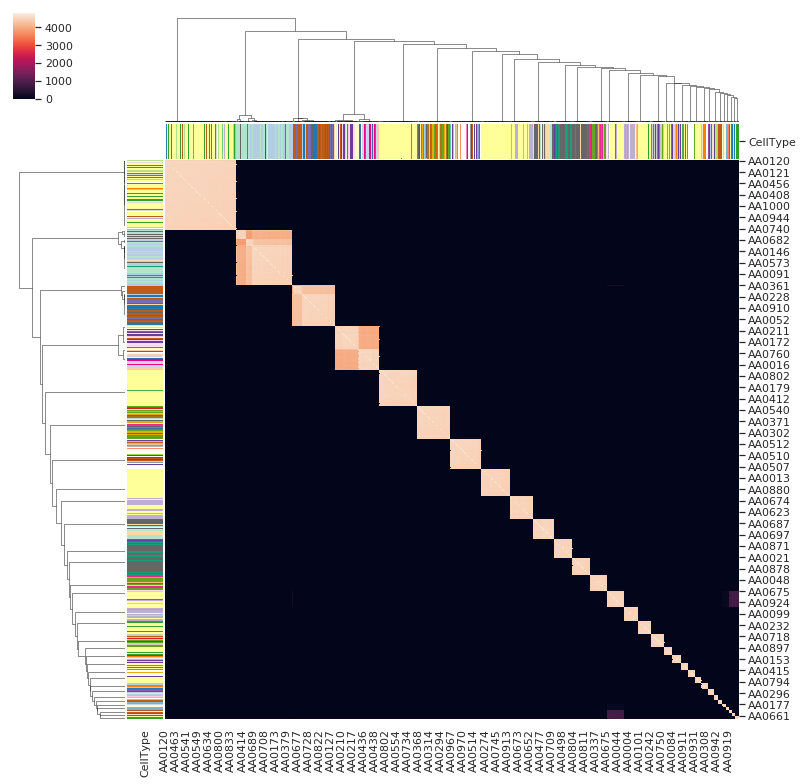

In [11]:
Ztemp= bestCOCLUSTER(SL_dbscanDF)

Please input the number of cluster: 29


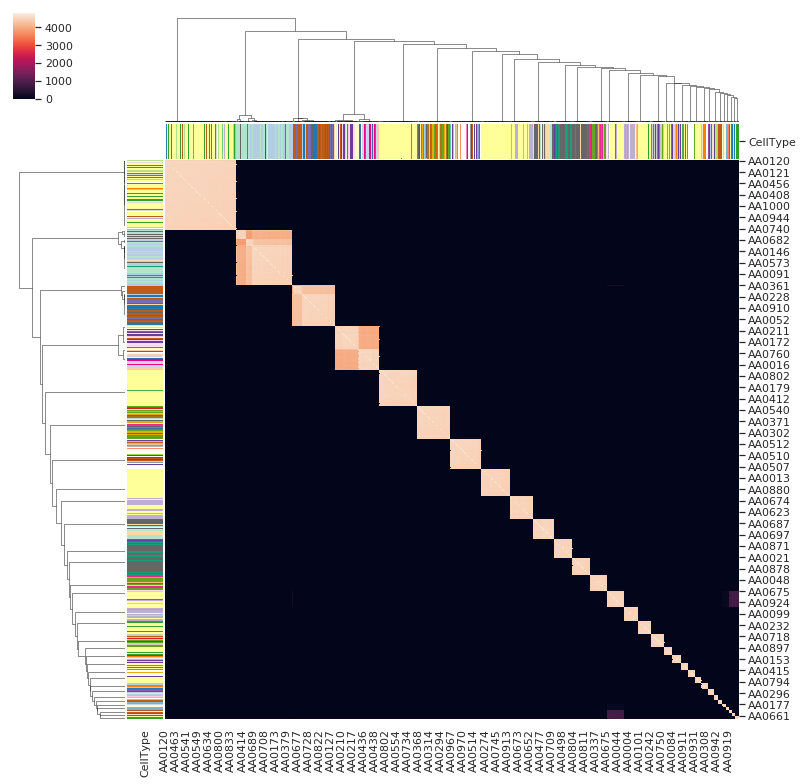

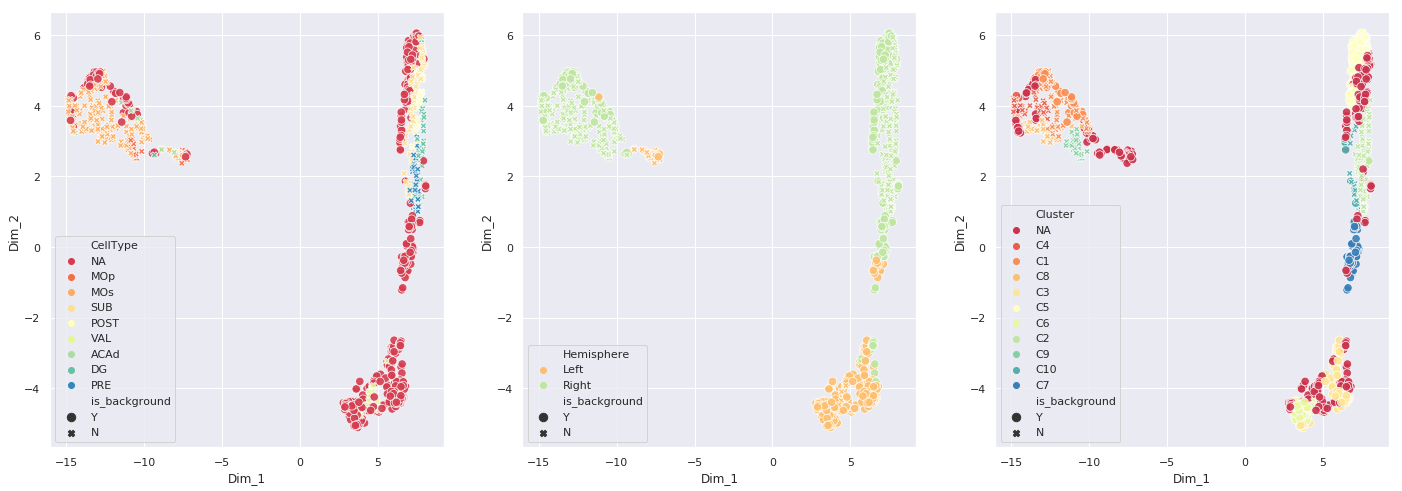

In [12]:
Ztemp= bestCOCLUSTER(SL_dbscanDF)
generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','SL_dbscan_ns')

#### HDBSACN

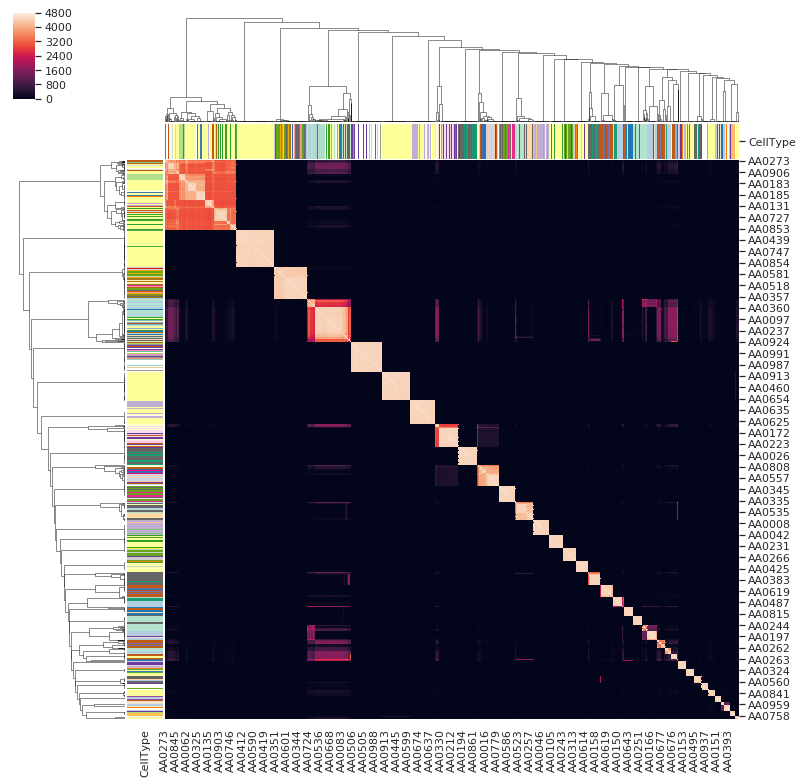

In [13]:
Ztemp= bestCOCLUSTER(SL_hdbscanDF)

Please input the number of cluster: 34


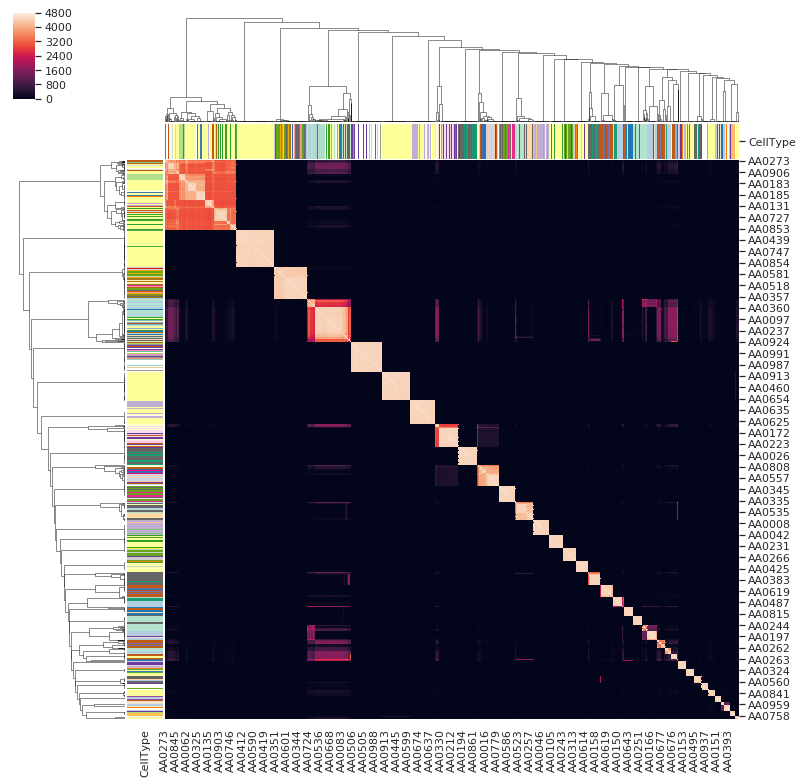

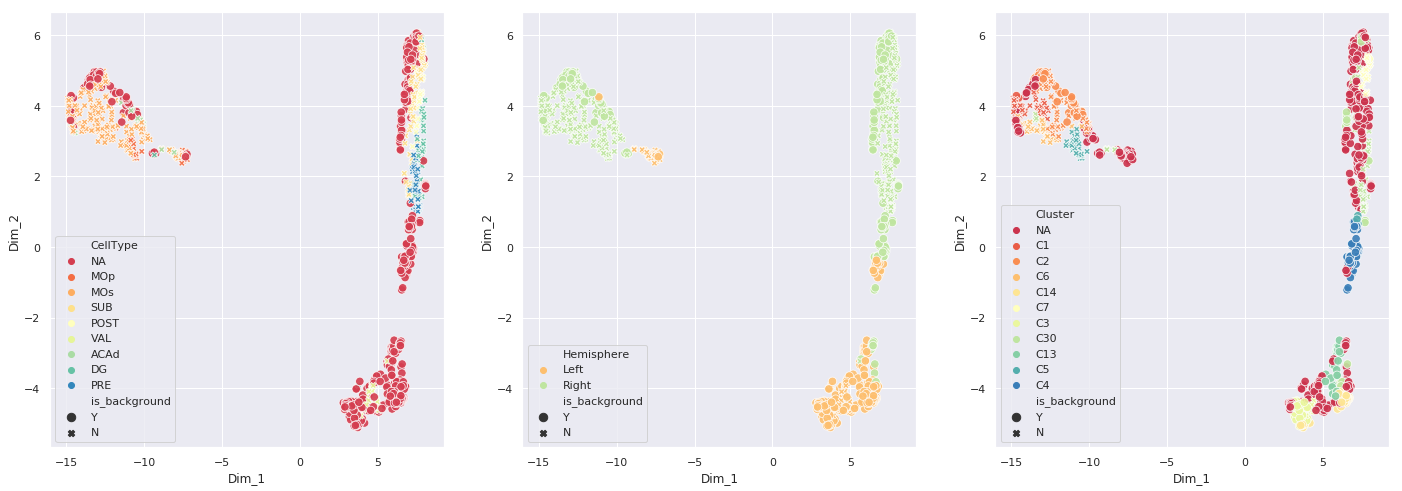

In [14]:
Ztemp= bestCOCLUSTER(SL_hdbscanDF)
generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','SL_hdbscan_ns')

#### SNN

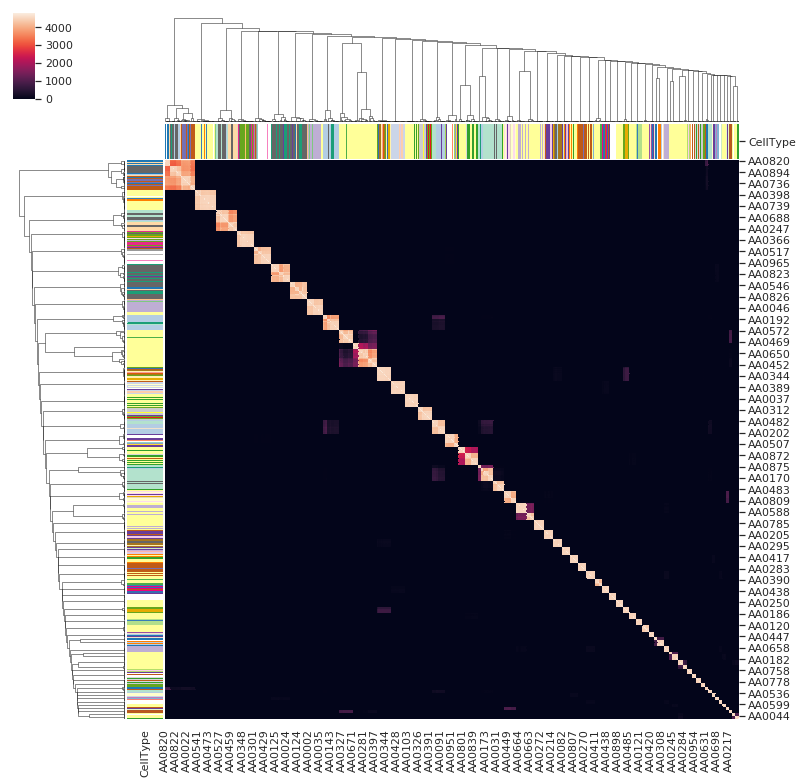

In [15]:
Ztemp= bestCOCLUSTER(SL_snnDF)

Please input the number of cluster: 65


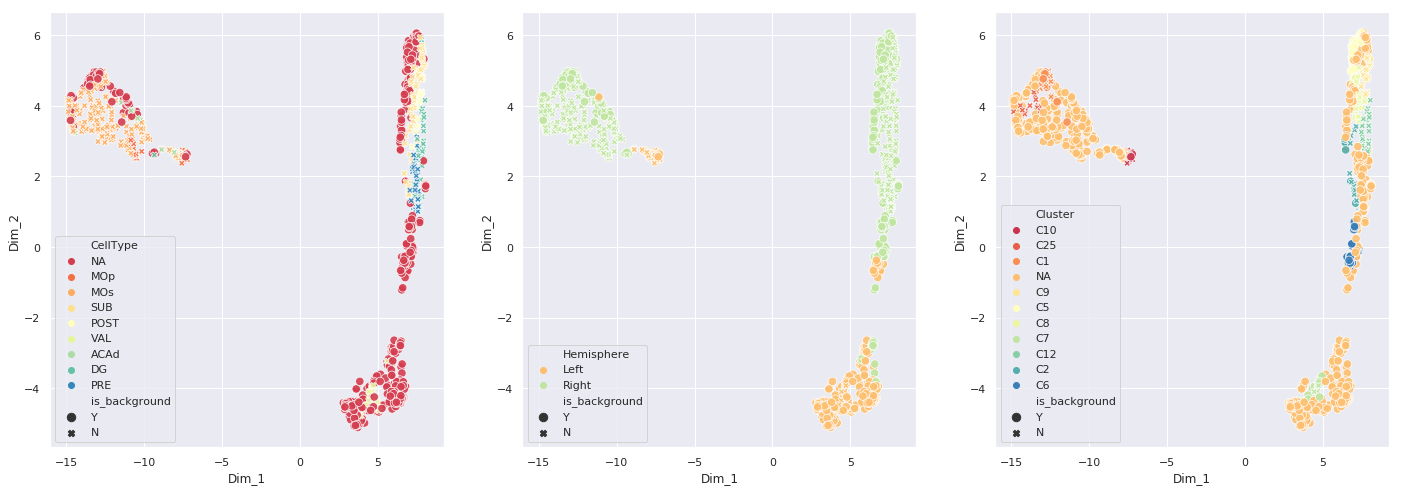

In [16]:

generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','SL_snn_ns')

## For axon projection features

In [17]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)


##### Hierarchy

Please input the number of cluster: 19


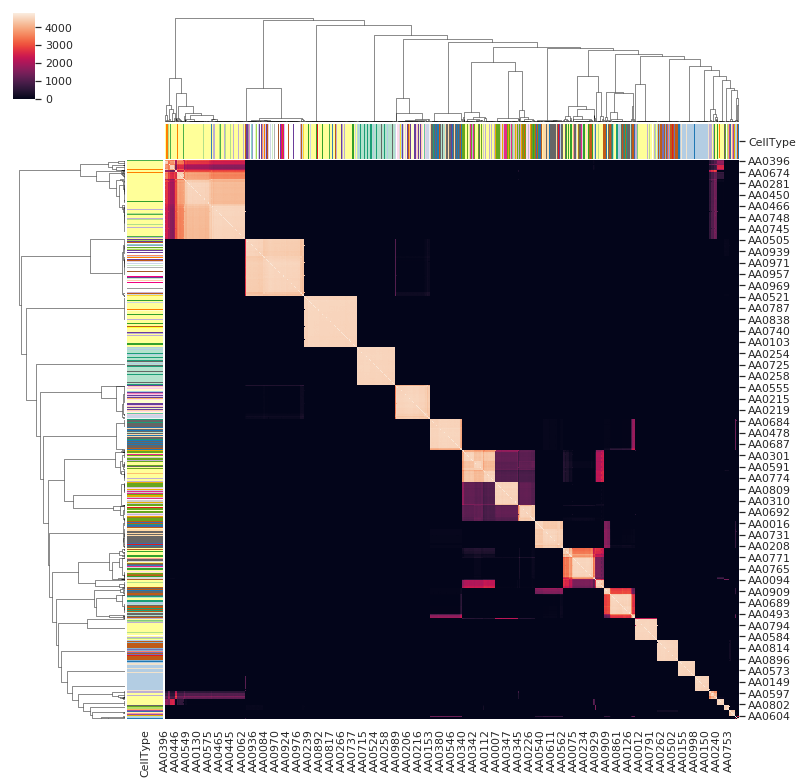

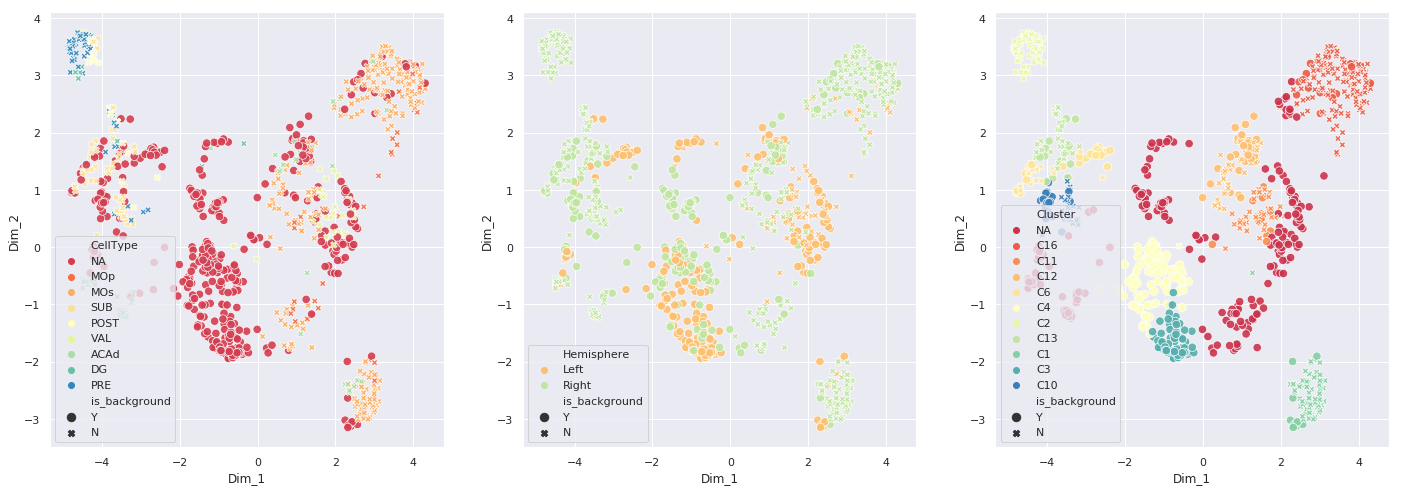

In [18]:
Ztemp= bestCOCLUSTER(AP_hierDF)

generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','AP_hier_ns')

##### Kmeans

Please input the number of cluster: 14


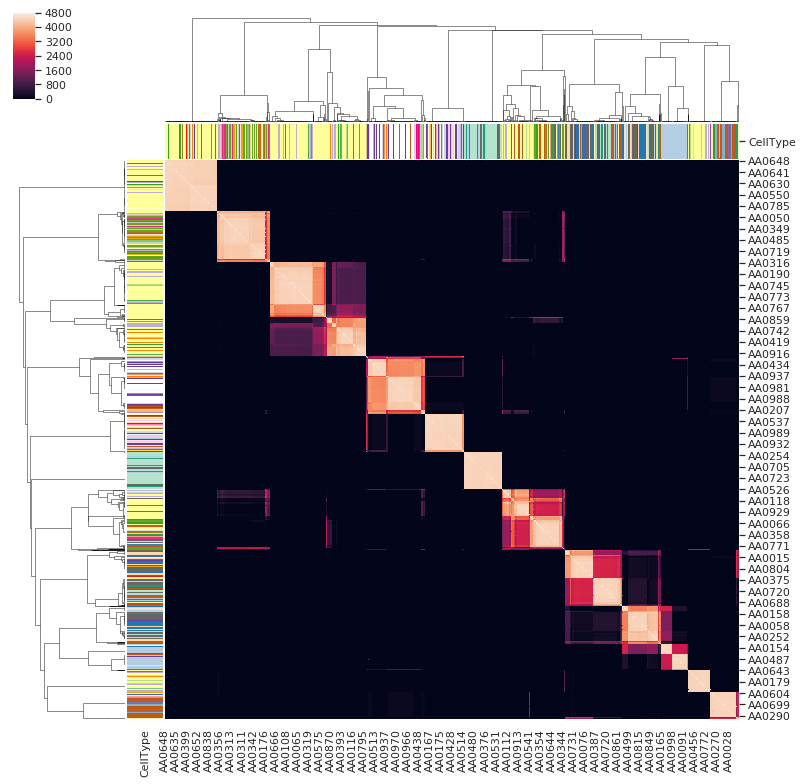

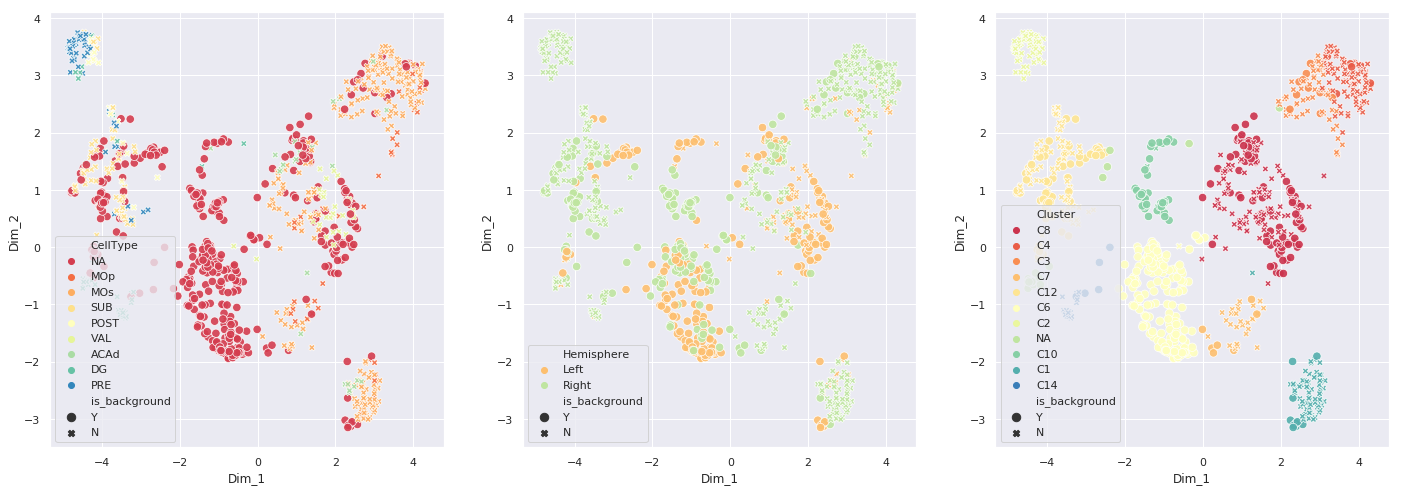

In [20]:
Ztemp= bestCOCLUSTER(AP_kmeansDF)

generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','AP_kmeans_ns')

##### DBSCAN

Please input the number of cluster: 24


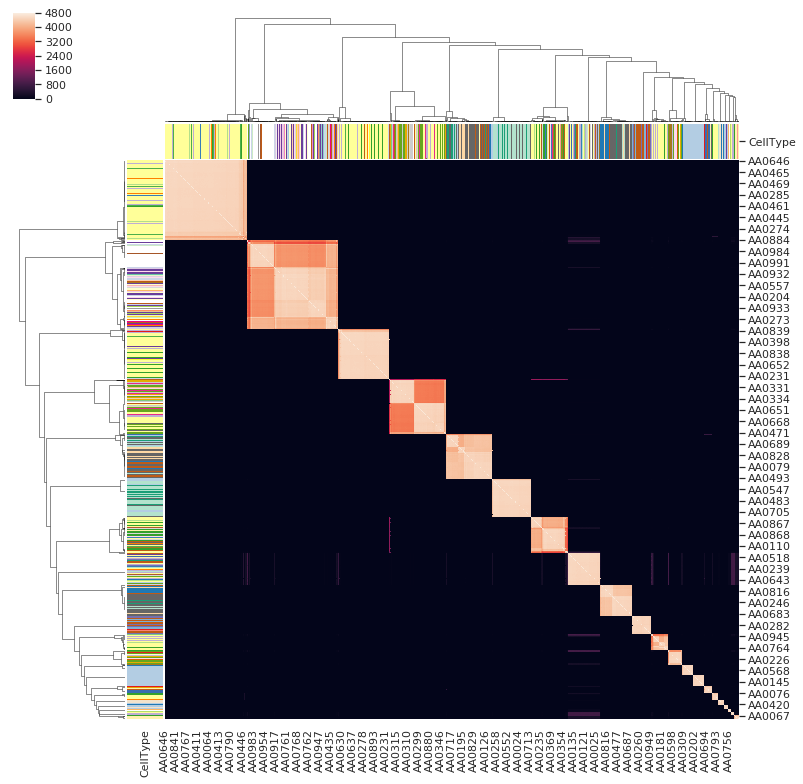

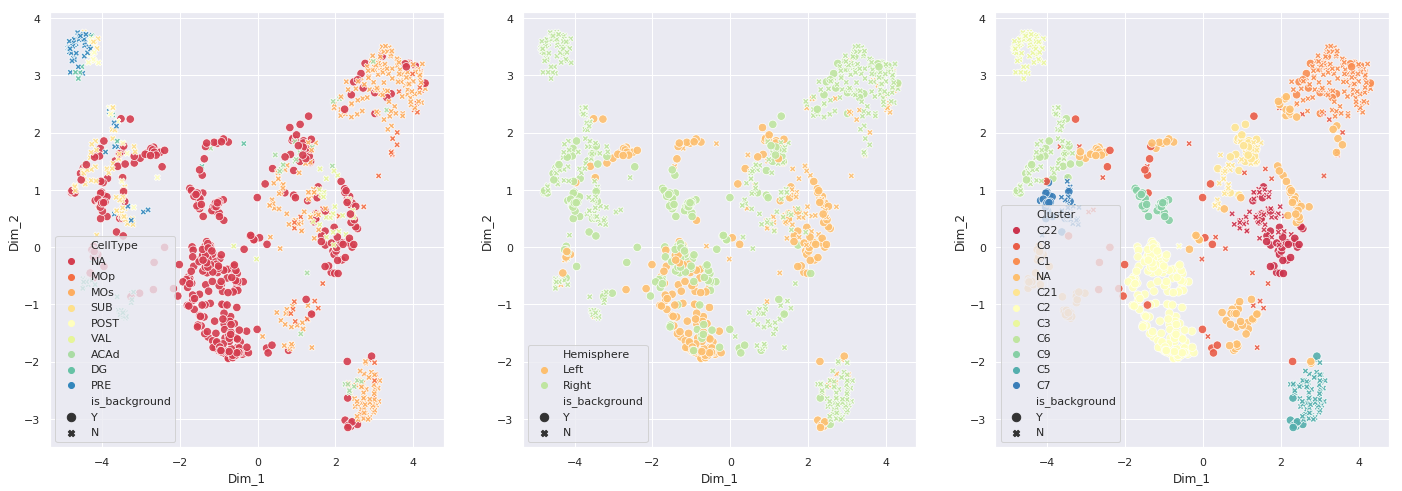

In [21]:
Ztemp= bestCOCLUSTER(AP_dbscanDF)

generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','AP_dbscan_ns')

##### HDBSCAN

Please input the number of cluster: 31


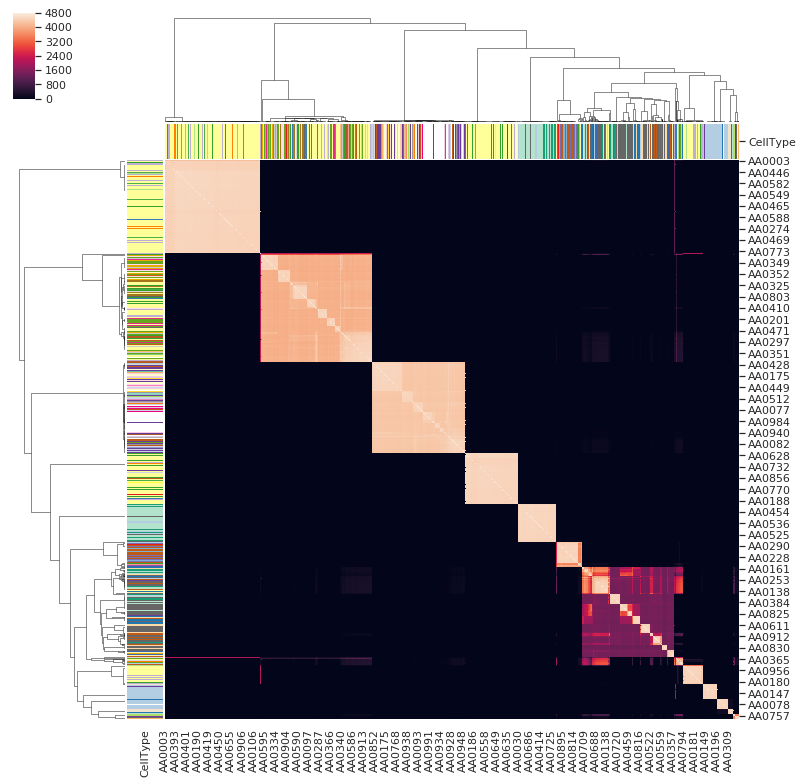

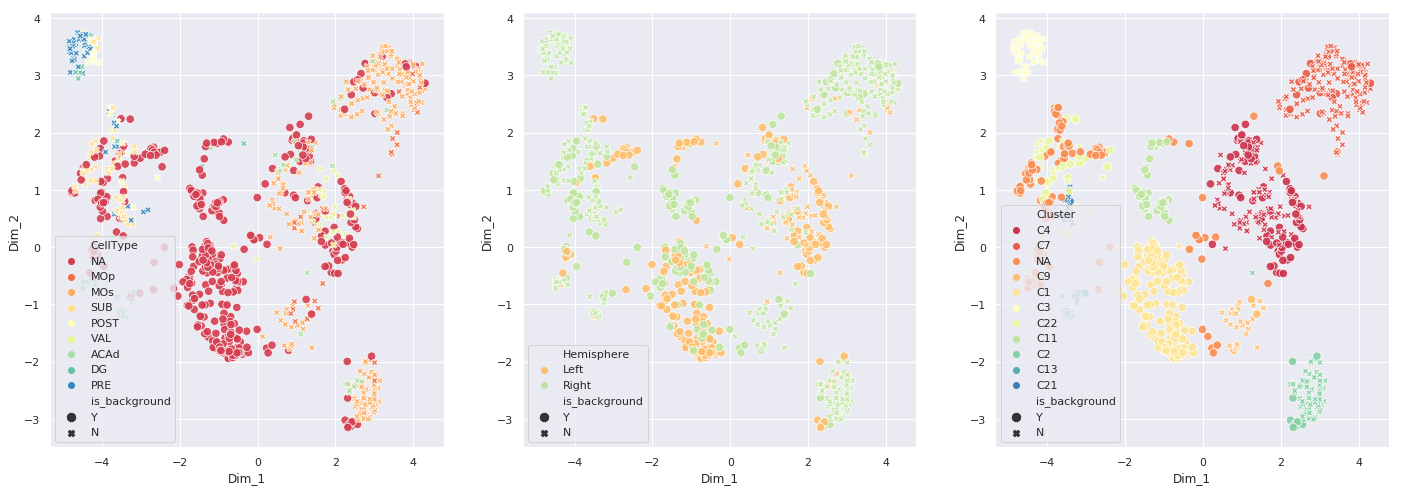

In [22]:
Ztemp= bestCOCLUSTER(AP_hdbscanDF)

generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','AP_hdbscan_ns')

Please input the number of cluster: 31


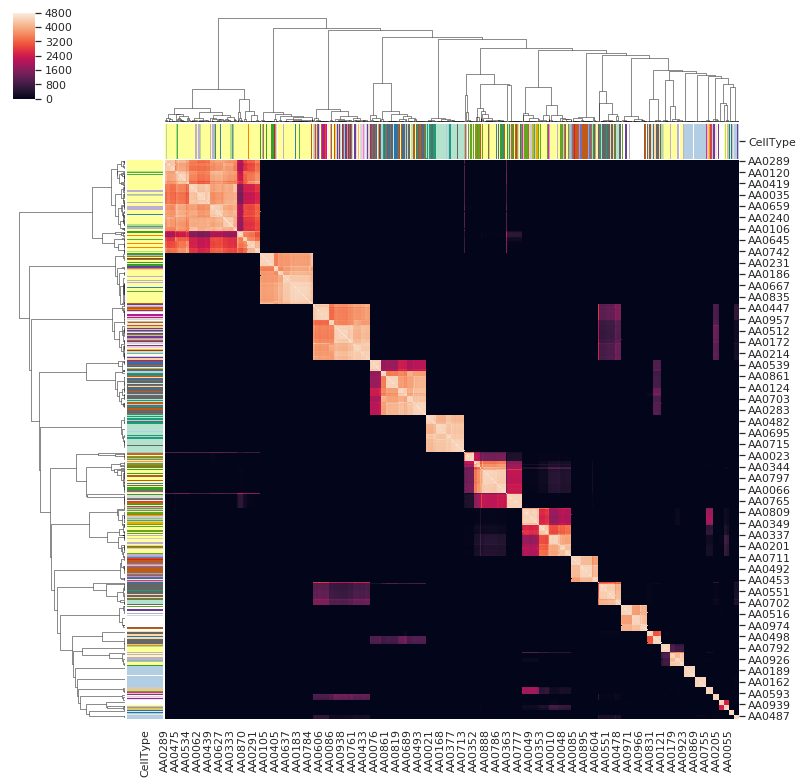

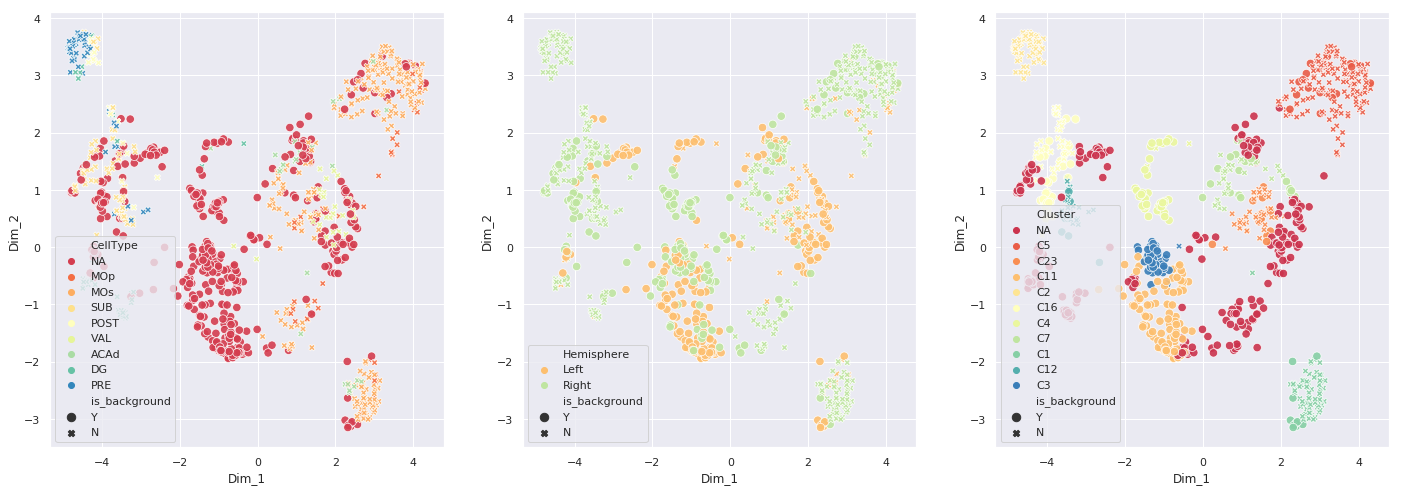

In [23]:
Ztemp= bestCOCLUSTER(AP_snnDF)

generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','AP_snn_ns')

## For axon morphology features

In [24]:
lm_axon_df_scale= pd.read_excel('/home/penglab/FeaCal/Jmorpho_features/lm_axon_df_scale.xlsx', index_col=0)


##### Hier

Please input the number of cluster: 8


/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/plot.py:260: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




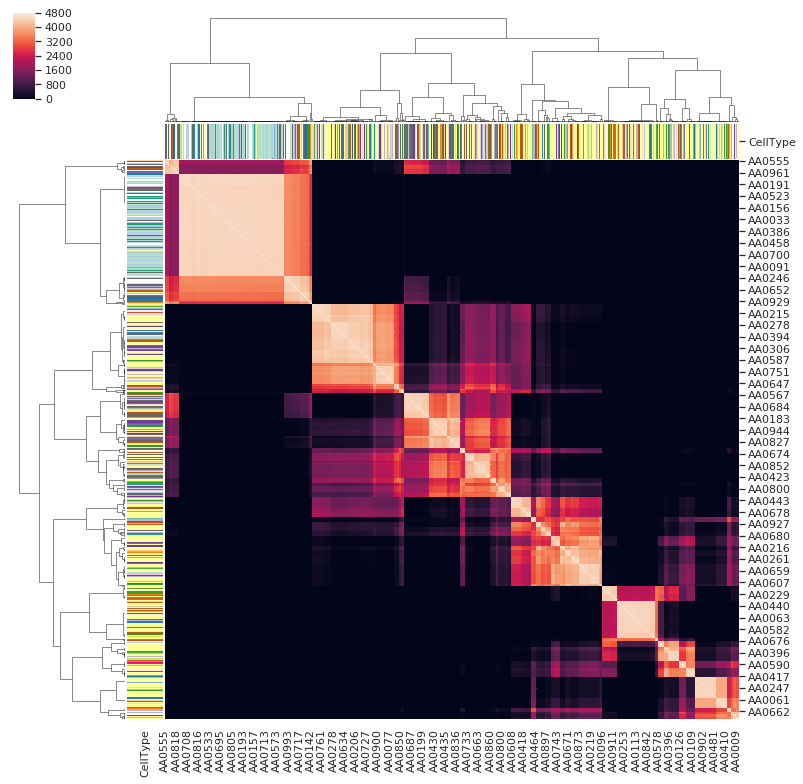

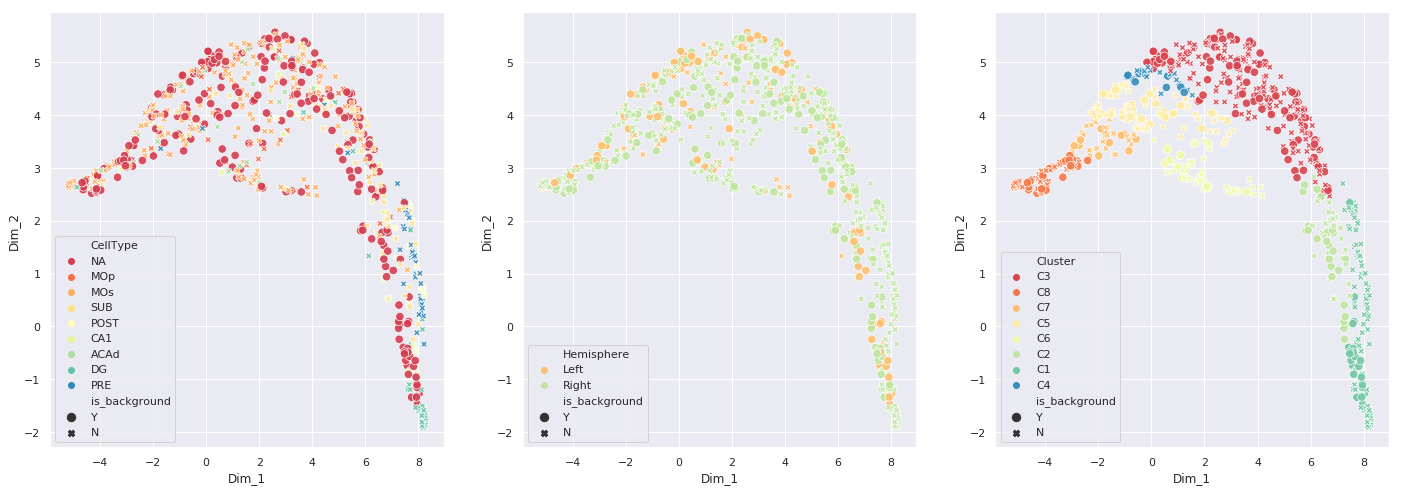

In [28]:

Ztemp= bestCOCLUSTER(AM_hierDF)

ns=generateNS(lm_axon_df_scale,ns,Ztemp,'/home/penglab/FeaCal/','AM_hier_ns')

##### Kmeans

Please input the number of cluster: 8


/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/plot.py:260: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




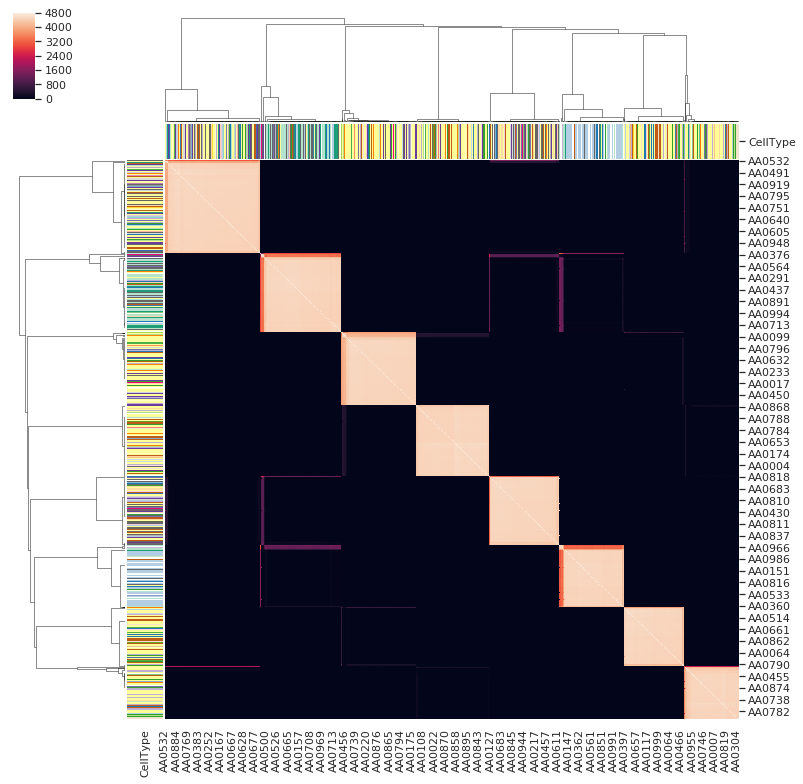

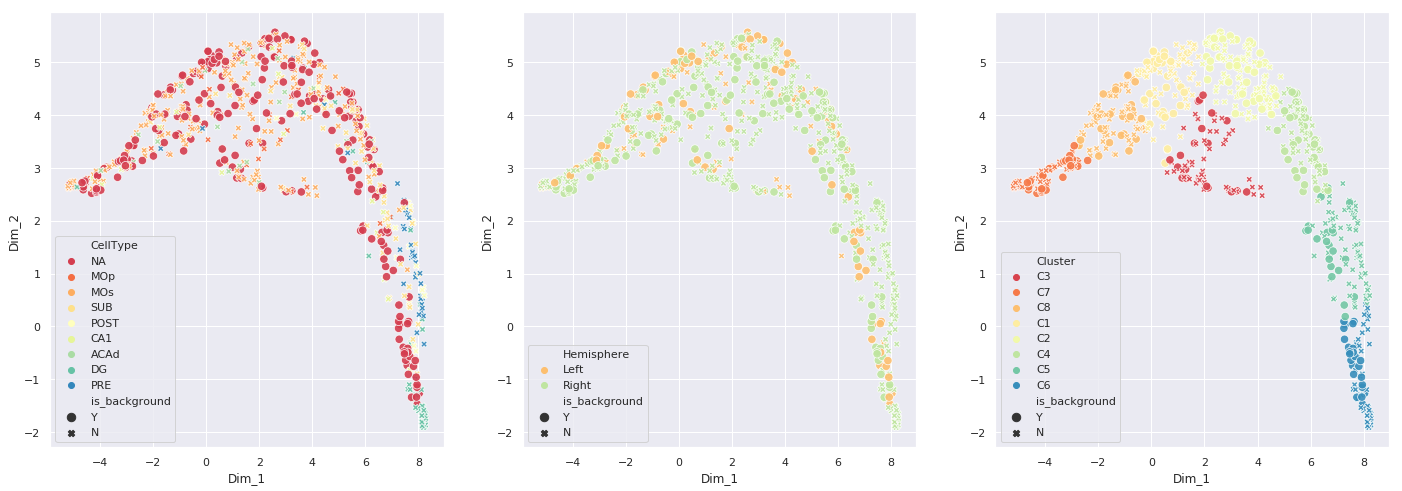

In [29]:

Ztemp= bestCOCLUSTER(AM_kmeansDF)

generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','AM_kmeans_ns')

##### DBSCAN

Please input the number of cluster: 8


/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/plot.py:260: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




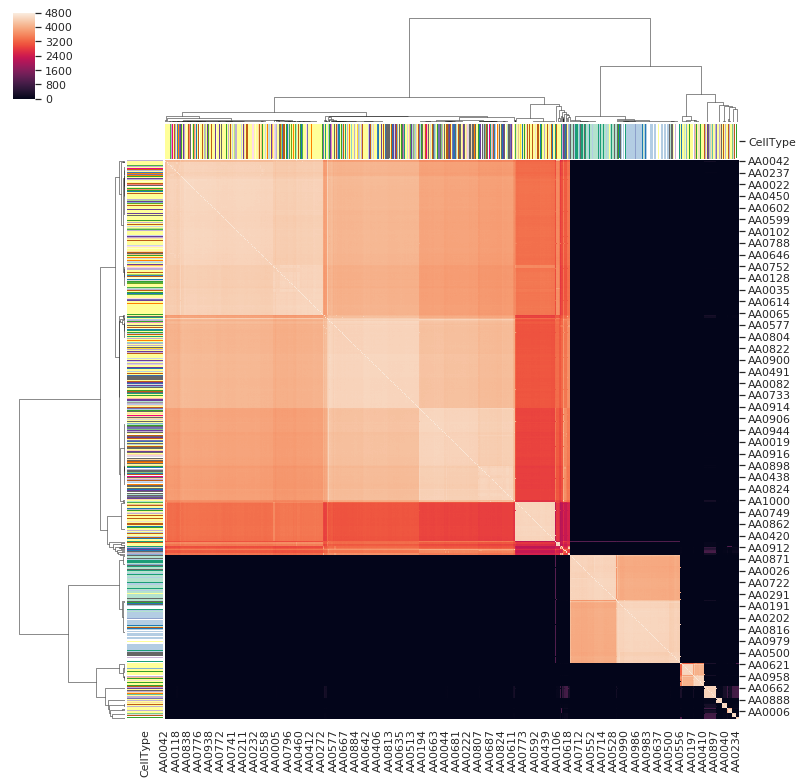

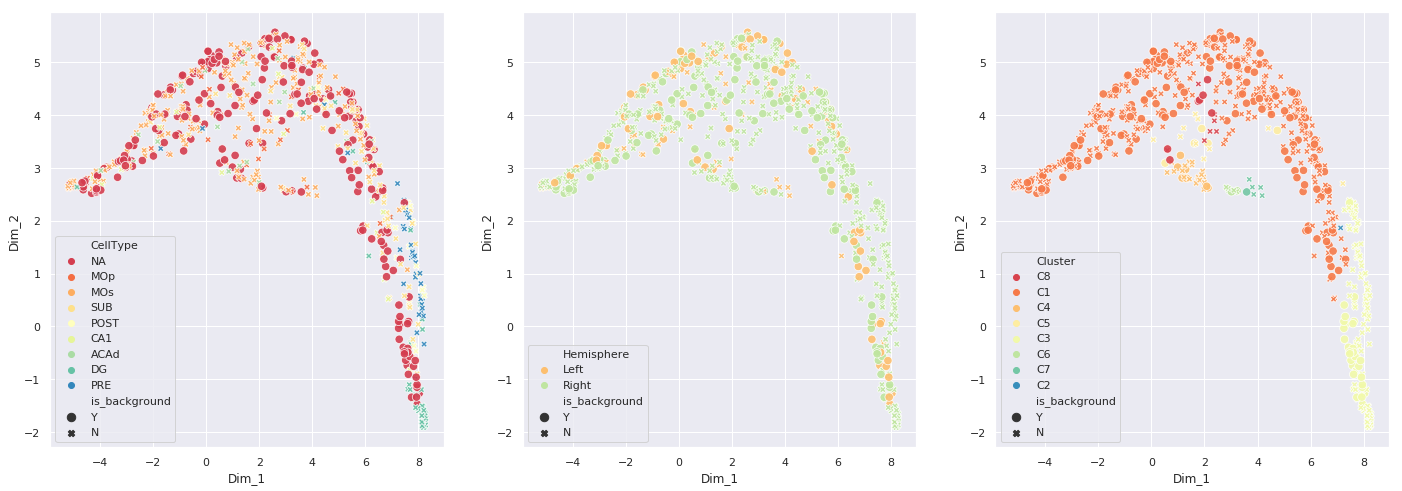

In [30]:

Ztemp= bestCOCLUSTER(AM_dbscanDF)

generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','AM_dbscan_ns')

##### HDBSCAN

Please input the number of cluster: 39


/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/plot.py:260: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




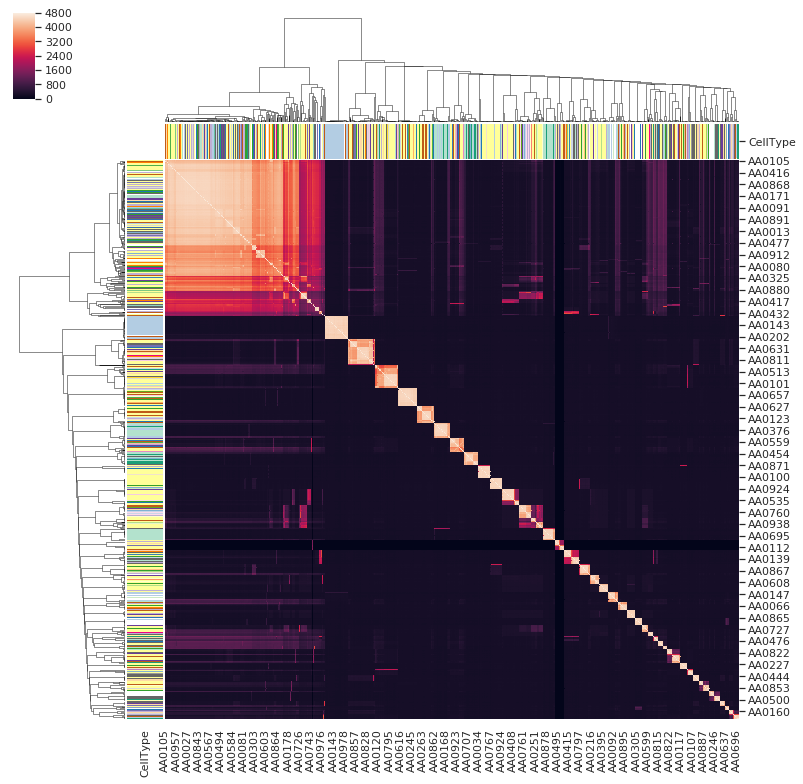

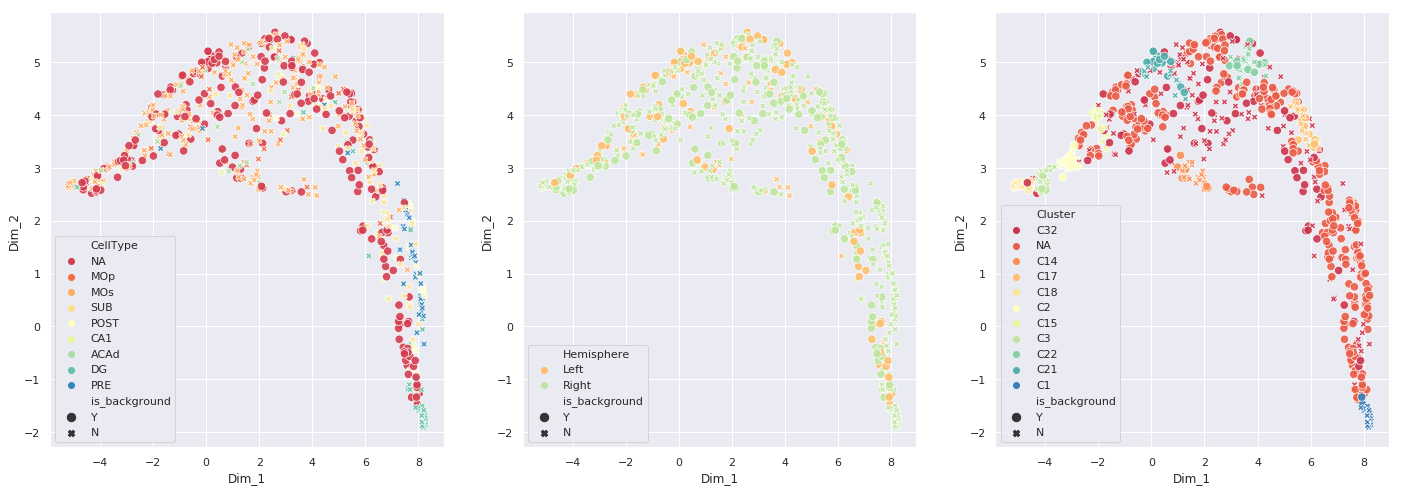

In [31]:

Ztemp= bestCOCLUSTER(AM_hdbscanDF)

generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','AM_hdbscan_ns')

#####  SNN

Please input the number of cluster: 23


/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/plot.py:260: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




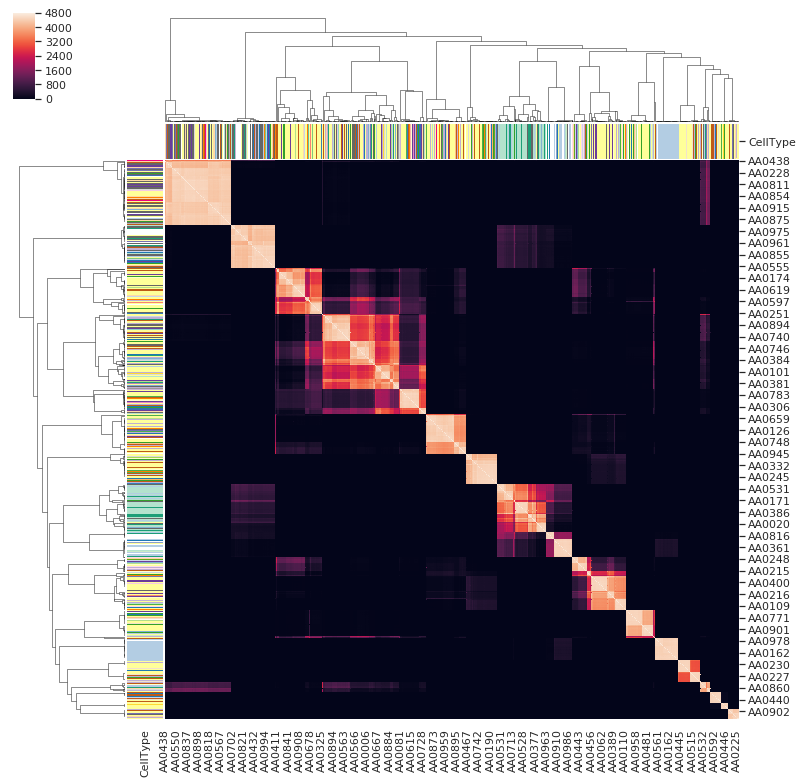

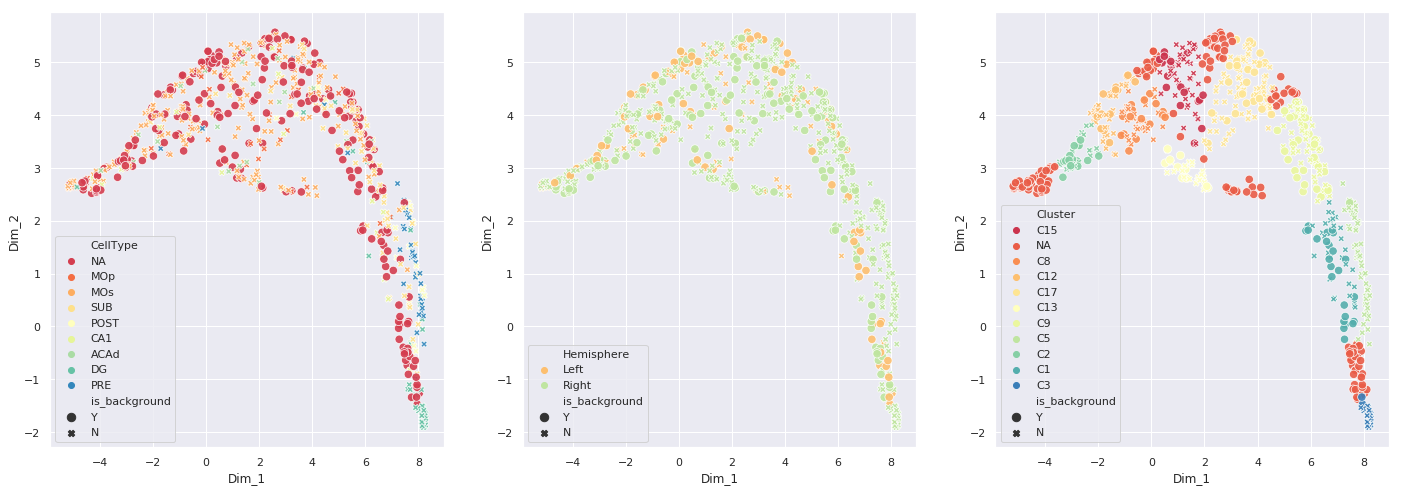

In [32]:

Ztemp= bestCOCLUSTER(AM_snnDF)

generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','AM_hdbscan_ns')

## For dendrite morphology features

In [33]:
lm_dendrite_df_scale= pd.read_excel('/home/penglab/FeaCal/Jmorpho_features/lm_dendrite_df_scale.xlsx', index_col=0)

##### Hierarchy

Please input the number of cluster: 8


/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/plot.py:260: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




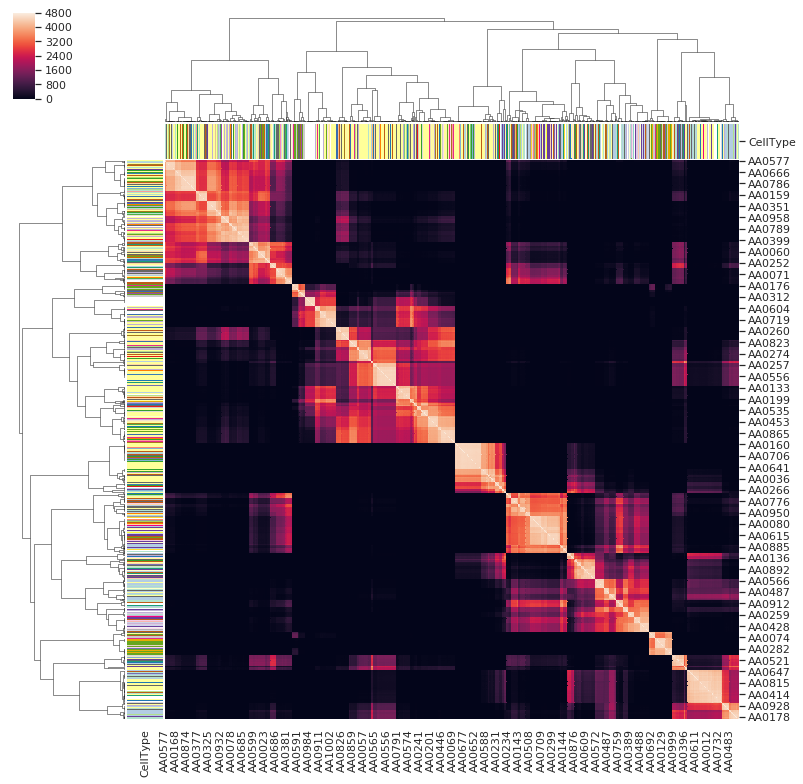

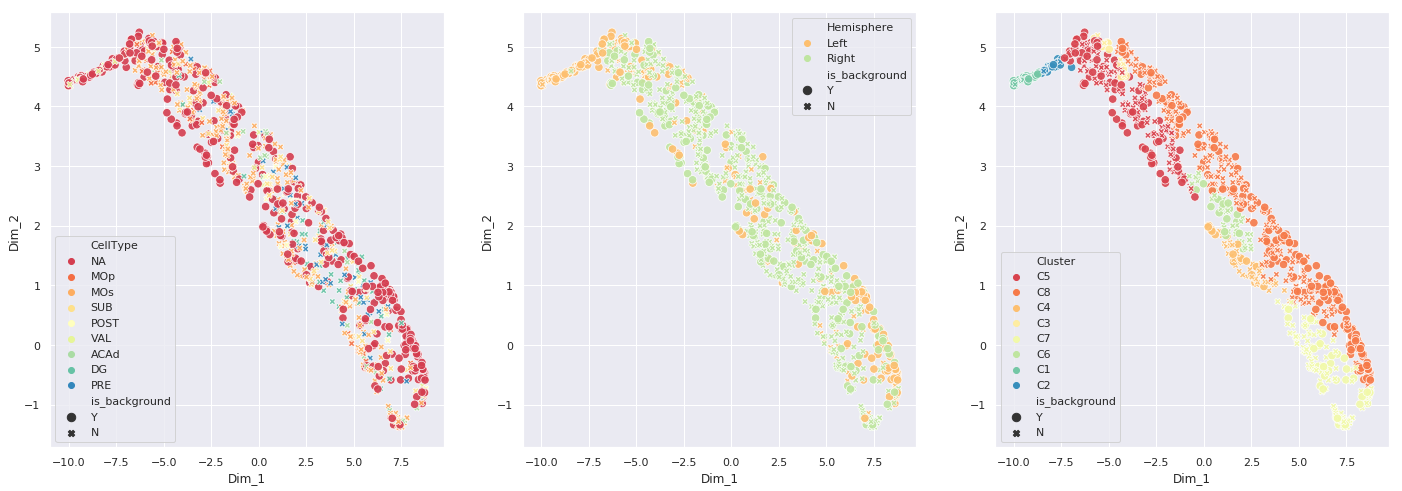

In [34]:

Ztemp= bestCOCLUSTER(DM_hierDF)
ns = generateNS(lm_dendrite_df_scale,ns,Ztemp,'/home/penglab/FeaCal/','DM_hier_ns')

##### Kmeans

In [ ]:

Ztemp= bestCOCLUSTER(DM_kmeansDF)
generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','DM_kmeans_ns')

##### DBSCAN

In [ ]:

Ztemp= bestCOCLUSTER(DM_dbscanDF)
generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','DM_dbscan_ns')

In [ ]:

Ztemp= bestCOCLUSTER(DM_hierDF)



import pickle
def generateNS(featureDF,ns_input,Z_sample,storePath,outname):
    if featureDF.shape!= (0,0):
        pickle_in = open("/home/penglab/FeaCal/ns.pickle","rb")
        example_ = pickle.load(pickle_in)
        ns_input= example_[0]

        index_origin = ns_input.metadata.index.tolist()
        ns_input.UMAP = nmt.UMAP_wrapper(featureDF, n_neighbors=100, min_dist=0.1, n_components=2, metric='euclidean',
                                   PCA_first=True,n_PC=100)
        index_after = ns_input.UMAP.index.tolist()
        if len(index_after)>len(index_origin ):
            index_update = [i for i in index_after if i in index_origin ]
        else:
            index_update = [i for i in index_origin if i in index_after ]
        
        ns_input.metadata = ns_input.metadata.loc[index_update,:]
    cur_clusters = coclusterResult(Z_sample)
    ns_input.metadata['Cluster'] = ['C' + str(i) for i in cur_clusters] 
    _ = ns_input.FeatureScatter(["CellType", "Hemisphere","Cluster"], map="UMAP")

## Weighted arithmetic mean of four clusters

#### Hierarchy

In [ ]:
DM_hierDF

In [ ]:
DM_hierDF